In [1]:
#pip install tensorflow

In [2]:
#pip install keras

In [3]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import cv2


from tensorflow.keras.datasets import cifar10

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_labels = ['aviao','carro','passaro','gato','veado','cachorro','sapo','cavalo','navio','caminhao']

y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
x_train_normalized = x_train.astype('float32')/255
x_test_normalized = x_test.astype('float32')/255

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

# Modelo

In [10]:
%%time
num_classes = 10
model = Sequential()
img_rows=32
img_cols=32
img_channels=3

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                        input_shape=(img_rows, img_cols, img_channels), activation='relu')) #Aplica a convolução
model.add(BatchNormalization()) #Normaliza a camada de entrada
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #Aplica a convolução
model.add(BatchNormalization()) #Normaliza a camada de entrada
model.add(MaxPooling2D(pool_size=(2, 2))) #Retira o maior elemento da região da matriz
model.add(Dropout(0.25)) #Dropout funciona zerando uma percentagens de neurônios nas camadas da rede neural.
model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) #Aplica a convolução
model.add(BatchNormalization()) #Normaliza a camada de entrada
model.add(MaxPooling2D(pool_size=(2, 2))) #Retira o maior elemento da região da matriz
model.add(Dropout(0.25)) #Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural.
model.add(Conv2D(128, (3, 3), padding='same', activation='relu')) #Aplica a convolução
model.add(BatchNormalization()) #Normaliza a camada de entrada
model.add(Flatten()) #Transforma a matriz em um array
model.add(Dense(1024, activation='relu')) #calcula uma função de ativação em conjunto com os dados de entrada e pesos.
model.add(Dropout(0.25)) #Dropout funciona zerando aleatoriamente uma percentagens de neurônios nas camadas da rede neural.
model.add(Dense(num_classes, activation='softmax'))#calcula uma função de ativação em conjunto com os dados de entrada e pesos.

CPU times: user 207 ms, sys: 119 ms, total: 327 ms
Wall time: 238 ms


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Treino

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', 
                                      patience=10, 
                                      restore_best_weights=True,
                                      mode = 'max'),

In [13]:
%%time
history = model.fit(x_train_normalized, y_train_onehot,
              batch_size= 5,
              epochs= 10,
              callbacks=early_stopping,
              validation_split=0.1,
              verbose=1)

Epoch 1/10
9000/9000 [==============================] - 238s 26ms/step - loss: 1.9374 - accuracy: 0.3719 - val_loss: 1.2301 - val_accuracy: 0.5800
Epoch 2/10
9000/9000 [==============================] - 232s 26ms/step - loss: 1.1993 - accuracy: 0.5863 - val_loss: 0.9571 - val_accuracy: 0.6746
Epoch 3/10
9000/9000 [==============================] - 229s 25ms/step - loss: 0.9705 - accuracy: 0.6659 - val_loss: 0.8391 - val_accuracy: 0.7268
Epoch 4/10
9000/9000 [==============================] - 229s 25ms/step - loss: 0.8499 - accuracy: 0.7075 - val_loss: 0.7440 - val_accuracy: 0.7490
Epoch 5/10
9000/9000 [==============================] - 227s 25ms/step - loss: 0.7626 - accuracy: 0.7390 - val_loss: 0.7743 - val_accuracy: 0.7616
Epoch 6/10
9000/9000 [==============================] - 226s 25ms/step - loss: 0.6953 - accuracy: 0.7602 - val_loss: 0.8124 - val_accuracy: 0.7706
Epoch 7/10
9000/9000 [==============================] - 225s 25ms/step - loss: 0.6367 - accuracy: 0.7818 - val_loss: 0

In [14]:
# O model evaluate prevê valores e calcula a perda e todas as métricas anexadas ao modelo em um determinado conjunto de dados. 
#Ele retorna uma lista contendo a perda e as métricas em um valor.

scores_teste = model.evaluate(x_test_normalized, y_test_onehot, verbose=1)
print("Acurácia de teste::", round(scores_teste[1] * 100, 2))

313/313 [==============================] - 2s 7ms/step - loss: 0.9725 - accuracy: 0.7815
Acurácia de teste:: 78.15


In [15]:
scores_treino = model.evaluate(x_train_normalized, y_train_onehot, verbose=1)
print("Acurácia de treino:", round(scores_treino[1] * 100, 2))

1563/1563 [==============================] - 11s 7ms/step - loss: 0.3324 - accuracy: 0.9103
Acurácia de treino: 91.03


# Função de predição para testes

In [16]:
def validador_predicao_manual(model, img):
    return np.argmax(model.predict(img[np.newaxis, ]))

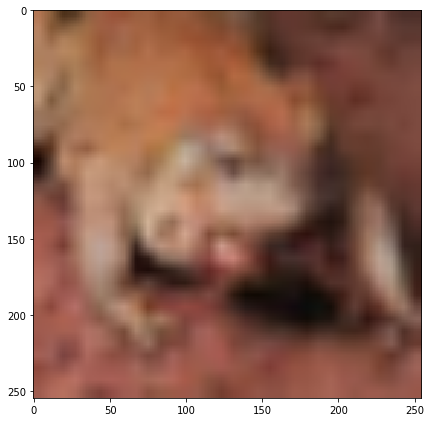

In [24]:
img = x_test_normalized[5]
plt.figure(figsize=(32,32))
plt.subplot(241)
plt.imshow(cv2.resize(img,(255,255)))

In [25]:
predicao = validador_predicao_manual(model, img)
print (predicao, y_labels[predicao])

6 sapo
